In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import random
import seaborn as sns

Plan: Remove missing values (NaN) from the dataset
Drop columns with drop() function
Remove outliers
Which neighbourhood/neighbourhood group has the lowest prices?
Does price correlate with popularity?
What factor has most impact with review rating

In [2]:
airbnb = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\frees\AppData\Local\Temp\ipykernel_5252\2622451596.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb = pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
airbnb.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [4]:
airbnb['NAME'] = airbnb['NAME'].fillna('Untitled')
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].fillna('Unconfirmed')
airbnb = airbnb.drop('license', axis=1)

In [5]:
airbnb

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,Untitled,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN


In [6]:
airbnb = airbnb.dropna(subset='price')
airbnb['price'] = airbnb['price'].replace(',','', regex=True)
airbnb['price'] = airbnb['price'].str[1:]
airbnb['price'] = airbnb['price'].astype(float)

C:\Users\frees\AppData\Local\Temp\ipykernel_5252\2648730396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price'] = airbnb['price'].replace(',','', regex=True)
C:\Users\frees\AppData\Local\Temp\ipykernel_5252\2648730396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb['price'] = airbnb['price'].str[1:]
C:\Users\frees\AppData\Local\Temp\ipykernel_5252\2648730396.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

<Axes: >

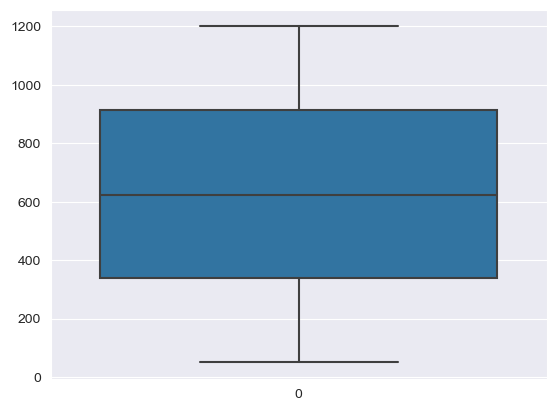

In [7]:
sns.boxplot(airbnb.price)

C:\Users\frees\AppData\Local\Temp\ipykernel_5252\1175464193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(airbnb.price)


<Axes: xlabel='price', ylabel='Density'>

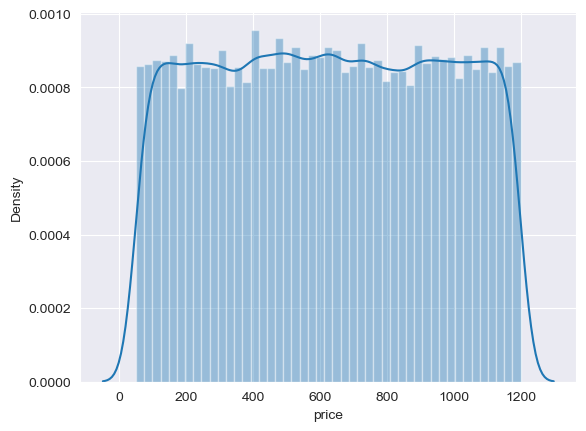

In [8]:
sns.distplot(airbnb.price)

In [9]:
airbnb = airbnb.dropna(subset='service fee')
airbnb['service fee'] = airbnb['service fee'].replace(',','', regex=True)
airbnb['service fee'] = airbnb['service fee'].str[1:]
airbnb['service fee'] = airbnb['service fee'].astype(float)

In [10]:
airbnb = airbnb.dropna(subset='neighbourhood group')
airbnb['neighbourhood group'] = airbnb['neighbourhood group'].replace(['brookln'],'Brooklyn')
airbnb['neighbourhood group'] = airbnb['neighbourhood group'].replace(['manhatan'], 'Manhattan')

In [11]:
airbnb.groupby(['neighbourhood group'])['price','service fee'].mean()

C:\Users\frees\AppData\Local\Temp\ipykernel_5252\4027864341.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  airbnb.groupby(['neighbourhood group'])['price','service fee'].mean()


,price,service fee
neighbourhood group,,
Bronx,627.678519,125.541481
Brooklyn,626.325410,125.265961
Manhattan,622.449329,124.490559
Queens,630.128854,126.025150
Staten Island,624.288421,124.858947


In [12]:
airbnb['neighbourhood group code'] = airbnb['neighbourhood group'].astype('category').cat.codes
airbnb[['reviews per month','review rate number','price']].corr()

,reviews per month,review rate number,price
reviews per month,1.000000,0.037910,0.004294
review rate number,0.037910,1.000000,-0.004437
price,0.004294,-0.004437,1.000000


In [13]:
#print(airbnb['neighbourhood group'].unique())

In [14]:
#print(airbnb['neighbourhood'].unique())

In [15]:
airbnb

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,neighbourhood group code
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,1
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,2
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,Unconfirmed,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",2
3,1002755,Untitled,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,1
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,1
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,2
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,1
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,3


In [16]:
airbnb.corr()

C:\Users\frees\AppData\Local\Temp\ipykernel_5252\3495028043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  airbnb.corr()


,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,neighbourhood group code
id,1.000000,-0.000269,-0.008899,0.042532,0.001185,0.007090,0.007090,0.005466,-0.040236,0.038425,0.036333,0.023706,-0.138486,0.017106
host id,-0.000269,1.000000,0.000711,-0.008814,0.004656,0.003554,0.003536,-0.002014,-0.004448,-0.001893,0.003553,0.001715,-0.002546,0.001711
lat,-0.008899,0.000711,1.000000,0.073953,0.005669,-0.005767,-0.005744,0.014937,-0.025274,-0.019209,-0.003707,0.032573,-0.004962,0.223610
long,0.042532,-0.008814,0.073953,1.000000,0.000780,0.003178,0.003173,-0.039368,0.069366,0.118656,0.015290,-0.104902,0.058606,0.120388
Construction year,0.001185,0.004656,0.005669,0.000780,1.000000,-0.003778,-0.003756,-0.000148,0.001682,0.004180,0.005142,-0.002745,-0.008797,-0.005482
price,0.007090,0.003554,-0.005767,0.003178,-0.003778,1.000000,0.999991,-0.003586,0.005157,0.004294,-0.004437,-0.000200,-0.003125,0.000093
service fee,0.007090,0.003536,-0.005744,0.003173,-0.003756,0.999991,1.000000,-0.003569,0.005134,0.004266,-0.004439,-0.000193,-0.003117,0.000084
minimum nights,0.005466,-0.002014,0.014937,-0.039368,-0.000148,-0.003586,-0.003569,1.000000,-0.049952,-0.095520,-0.002398,0.084443,0.063713,0.010570
number of reviews,-0.040236,-0.004448,-0.025274,0.069366,0.001682,0.005157,0.005134,-0.049952,1.000000,0.591395,-0.018037,-0.080717,0.099197,0.008504
reviews per month,0.038425,-0.001893,-0.019209,0.118656,0.004180,0.004294,0.004266,-0.095520,0.591395,1.000000,0.037910,-0.025038,0.077068,0.055629


Ranking correlations

In [17]:
airbnb.corr(numeric_only=True).unstack().sort_values(ascending = False).drop_duplicates()

id                              id                                1.000000
service fee                     price                             0.999991
reviews per month               number of reviews                 0.591395
lat                             neighbourhood group code          0.223610
availability 365                calculated host listings count    0.159805
                                                                    ...   
minimum nights                  number of reviews                -0.049952
calculated host listings count  number of reviews                -0.080717
reviews per month               minimum nights                   -0.095520
long                            calculated host listings count   -0.104902
availability 365                id                               -0.138486
Length: 92, dtype: float64

In [18]:
airbnb = airbnb.dropna(subset='reviews per month')
airbnb.isna().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                           321
neighbourhood group                   0
neighbourhood                        15
lat                                   7
long                                  7
country                             486
country code                        110
instant_bookable                     87
cancellation_policy                  64
room type                             0
Construction year                   177
price                                 0
service fee                           0
minimum nights                      351
number of reviews                    60
last review                          24
reviews per month                     0
review rate number                  286
calculated host listings count      261
availability 365                    176
house_rules                       45416


In [19]:
x = airbnb['price']
y = airbnb['review rate number'].fillna(random.randint(1,5))

In [20]:
#mask = ~np.isnan(varx) & ~np.isnan(vary)


In [21]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [22]:
def cal_regression(x_value):
    return slope*x_value + intercept

In [23]:
model = list(map(cal_regression,x))

In [24]:
print(model)

[3.2696832679610215, 3.28991742755911, 3.284367767280993, 3.288394954385467, 3.279235559324682, 3.29166090490312, 3.2673750021816277, 3.268406354976676, 3.2862585807385813, 3.2855710122085493, 3.27852343477572, 3.2758713847313103, 3.279161891267893, 3.2897455354266016, 3.281691161217654, 3.2901384317294773, 3.267620562370925, 3.2733666708004794, 3.26455106000471, 3.2803896922143787, 3.2882721742908183, 3.2827961820694913, 3.277050073639937, 3.2744962476712463, 3.2808317005551135, 3.272335318005431, 3.280021351930433, 3.2887141826315536, 3.266122645216212, 3.2664664294812282, 3.268602803128114, 3.279579343589698, 3.284318655243134, 3.276534397242413, 3.2723844300432905, 3.291881909073487, 3.282722514012702, 3.270911068907507, 3.2821331695583886, 3.2844905473756416, 3.2881985062340293, 3.2755276004662943, 3.271279409191453, 3.285178115905674, 3.2871671534389812, 3.271230297153594, 3.282624289936983, 3.2682590188630978, 3.277246521791375, 3.2800704639682925, 3.2871180414011216, 3.28618491

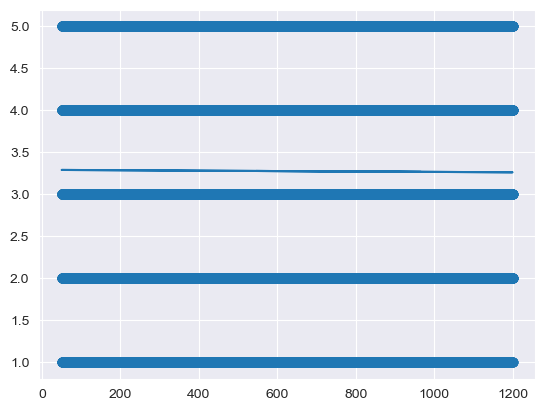

In [25]:
plt.scatter(x,y)
plt.plot(x, model)
plt.show()